<a href="https://colab.research.google.com/github/lucywowen/csci591_CCN/blob/main/assignments/assignment_1_LO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 -  & Computational Programming

## *YOUR FULL NAME HERE*
Netid: Your netid here

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus on Canvas for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

#  Learning Objectives
The purpose of this assignment is to provide a refresher on fundamental concepts that we will use throughout this course, and provide an opportunity to develop skills in any of the related skills that may be unfamiliar to you. Through the course of completing this assignment, you will...
- Practice numerical programming by loading and filtering data, plotting data, vectorizing operations, profiling code speed, and debugging and optimizing performance. You will also practice computing probabilities based on simulation.
- Develop or refresh your knowledge of Git version control, which will be a core tool used in the final project of this course
- Apply your skills altogether through an exploratory data analysis to practice data cleaning, data manipulation, interpretation, and communication

We will build on these concepts throughout the course, so use this assignment as a catalyst to deepen your knowledge and seek help with anything that is unfamiliar.


*Note: for all assignments, write out all equations and math using markdown and [LaTeX](https://tobi.oetiker.ch/lshort/lshort.pdf). For this assignment show ALL math work*

**ANSWER**

# Numerical Programming

## 1
**[30 points]** Loading data and gathering insights from a real dataset

In data science, we often need to have a sense of the idiosyncrasies of the data, how they relate to the questions we are trying to answer, and to use that information to help us to determine what approach we may need to apply to achieve our goal. This exercise provides practice in exploring a dataset and answering question that might arise from applications related to the data.


**Data**. The data for this problem can be found in the `data` subfolder in the `assignments` folder on [github](https://github.com/lucywowen/csci591_CCN). The filename is `stroke.csv`.

A stroke occurs when the blood flow to a part of the brain is reduced or restricted. Due to this brain cells start to die, in that part of the brain, at a very fast rate due to a lack of oxygen and nutrients. There are two types of brain strokes: (a) Ischemic stroke and (b) Haemorrhagic stroke of which ischemic stroke is more likely to occur. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues.
 Here we have used 8 input parameters like gender, age, various diseases, and smoking status in this dataset on brain stroke detection from Kaggle.
 The following information is provided about the patient:

    
|field    |description|
|:-----   |:-----|
|id       |unique identifier|
|gender   |'Male', 'Female', or 'Other'|
|age   |age of patient|
|hypertension    |0 if patient doesn't have hypertension; 1 if patient has hypertension|
|heart_disease      |0 if patient doesn't have heart disease; 1 if patient has heart disease|
|ever_married     |'No', 'Yes'|
|work_type |'children', 'Govt_jov', 'Never_worked', 'Private', 'Self-employed' |
|Residence_type   |'Rural', 'Urban' |
|avg_glucose_level |average glucose level of the patient|
|bmi |body mass index of the patient|
|smoking_status |'formerly smoked', 'never smoked', 'smokes', 'Unknown'|
|stroke |0 if patient has not had a stroke; 1 if patient has had a stroke|


**Your objective**. For this dataset, your goal is answer the following questions about these patients:

**(a)** Calculate the bmi mean and standard deviation for patients who have had a stroke. Calculate the bmi mean and standard deviation for patients who have had NOT had stroke.

**(b)** Assess the NA values in the data. Count the rows that have stroke as 0 and 1 respectively when bmi is null.

**(c)** Recalculate the bmi mean and standard deviation for patients who have had and have not had a stroke.  Plot this data as a box plot.

**(d)** Plot the same boxplot as above, but with the raw data plotted.  What additional information does this raw data provide? Briefly explain the differences between the plots shown in c and d.

**(e)** Plot a histogram of age distributions of the patients that have had strokes and patients that have not had strokes.  

**(f)** Plot a density plot of age distributions of the patients that have had strokes and patients that have not had strokes.  How is this plot different from the histogram plotted in e?  

**(g)** Plot a density plot of age distributions of the patients that have had strokes and patients that have not had strokes, by gender.  

**(h)** Plot a density plot of age distributions of the patients that have had strokes and patients that have not had strokes, by gender 'Male' and 'Female'. What changes with this plot relative to what you plotted for g?  

In [1]:
from google.colab import files
uploaded = files.upload()

Saving stroke.csv to stroke.csv


In [2]:
import pandas as pd # For data manupulation.
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For visualization
import warnings # For suppressing warnings
import numpy as np
warnings.filterwarnings("ignore")

In [3]:
# Loading data into a pandas dataframe and printing out its sample.
strokes_data = pd.read_csv("stroke.csv")
strokes_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
strokes = strokes_data[strokes_data['stroke']==1]
nostrokes = strokes_data[strokes_data['stroke']==0]

In [5]:
print(strokes['bmi'].mean())
print(nostrokes['bmi'].mean())

30.471291866028707
28.823063829787234


In [6]:
print(strokes['bmi'].std())
print(nostrokes['bmi'].std())

6.3294518200464465
7.908287073929458


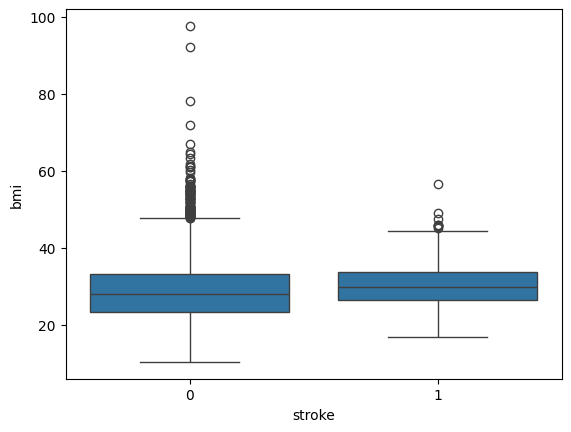

In [7]:
sns.boxplot(x='stroke', y='bmi', data=strokes_data)
plt.show()

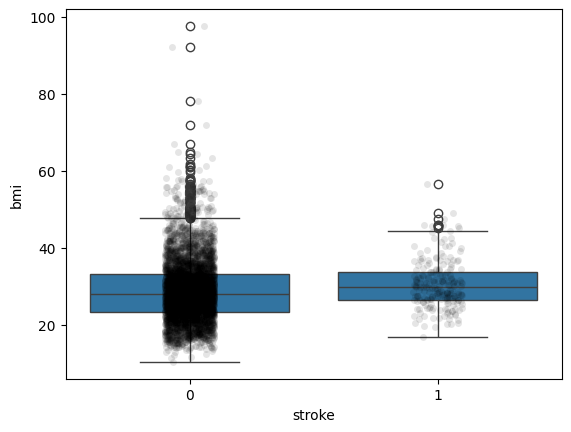

In [8]:
b = sns.boxplot(x='stroke', y='bmi', data=strokes_data)
b = sns.stripplot(x='stroke', y='bmi', data=strokes_data, color = "black", alpha=.1)
b.get_figure();

In [9]:
mean_value = strokes_data['bmi'].mean()
strokes_data.fillna(mean_value, inplace = True)

In [12]:
strokes = strokes_data[strokes_data['stroke']==1]
nostrokes = strokes_data[strokes_data['stroke']==0]

In [13]:
print(strokes['bmi'].mean())
print(nostrokes['bmi'].mean())

30.217789062135687
28.825388015387563


In [14]:
print(strokes['bmi'].std())
print(nostrokes['bmi'].std())

5.825588851073918
7.7762028356302695


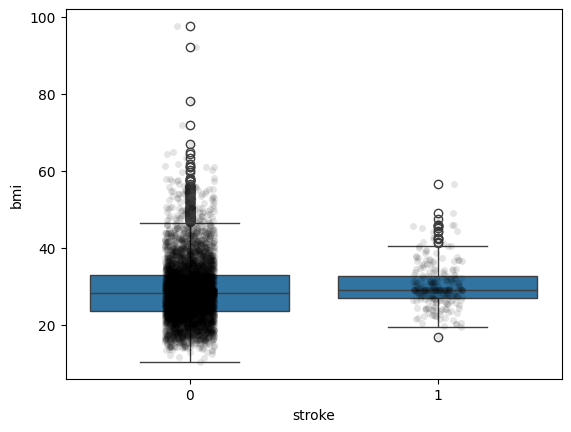

In [15]:
b = sns.boxplot(x='stroke', y='bmi', data=strokes_data)
b = sns.stripplot(x='stroke', y='bmi', data=strokes_data, color = "black", alpha=.1)
b.get_figure();

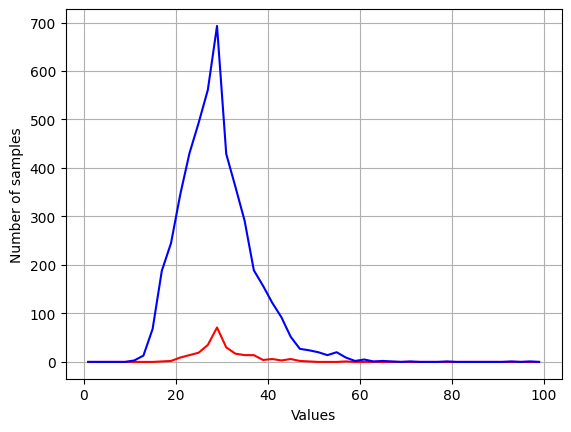

In [16]:
histx, binsx = np.histogram(strokes['bmi'], bins=50, range=(0, 100))
histy, binsy = np.histogram(nostrokes['bmi'], bins=50, range=(0, 100))
centerx = (binsx[:-1] + binsx[1:]) / 2
centery = (binsy[:-1] + binsy[1:]) / 2
plt.plot(centerx,histx,'r-',label='x')
plt.plot(centery,histy,'b-',label='y')
plt.xlabel('Values')
plt.ylabel('Number of samples')
plt.grid('on')
plt.show()

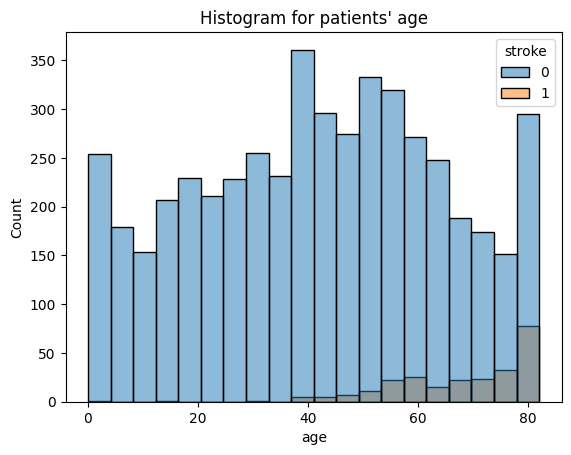

In [24]:
sns.histplot(data = strokes_data, x = 'age', hue="stroke")
plt.title("Histogram for patients' age")
plt.show()

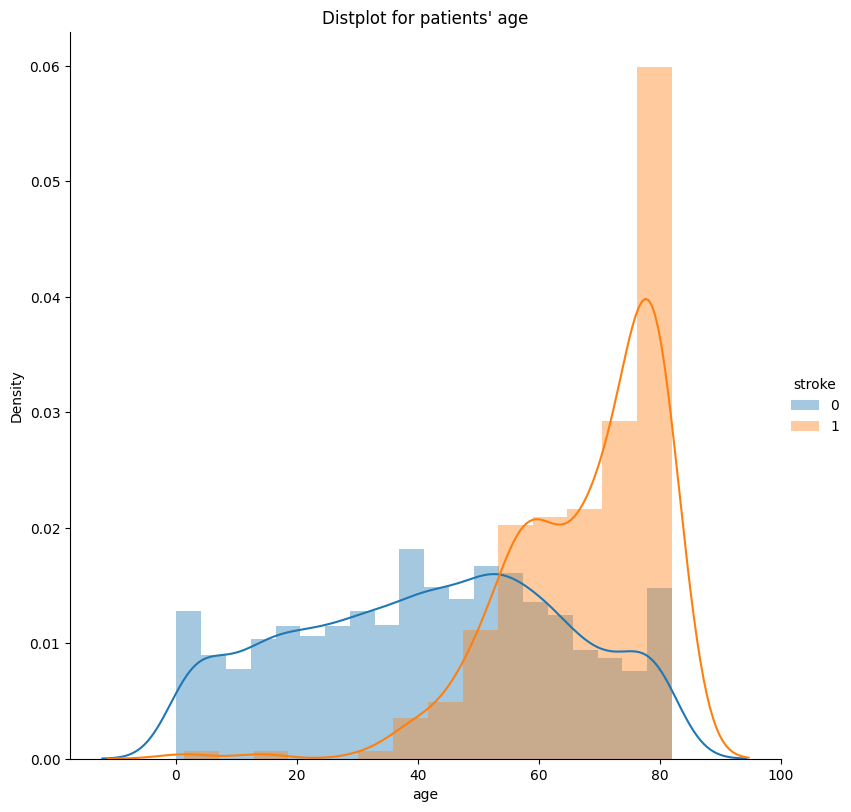

In [36]:
sns.FacetGrid(strokes_data, hue="stroke", height = 8).map(sns.distplot, "age").add_legend()
plt.title("Distplot for patients' age")
plt.show()

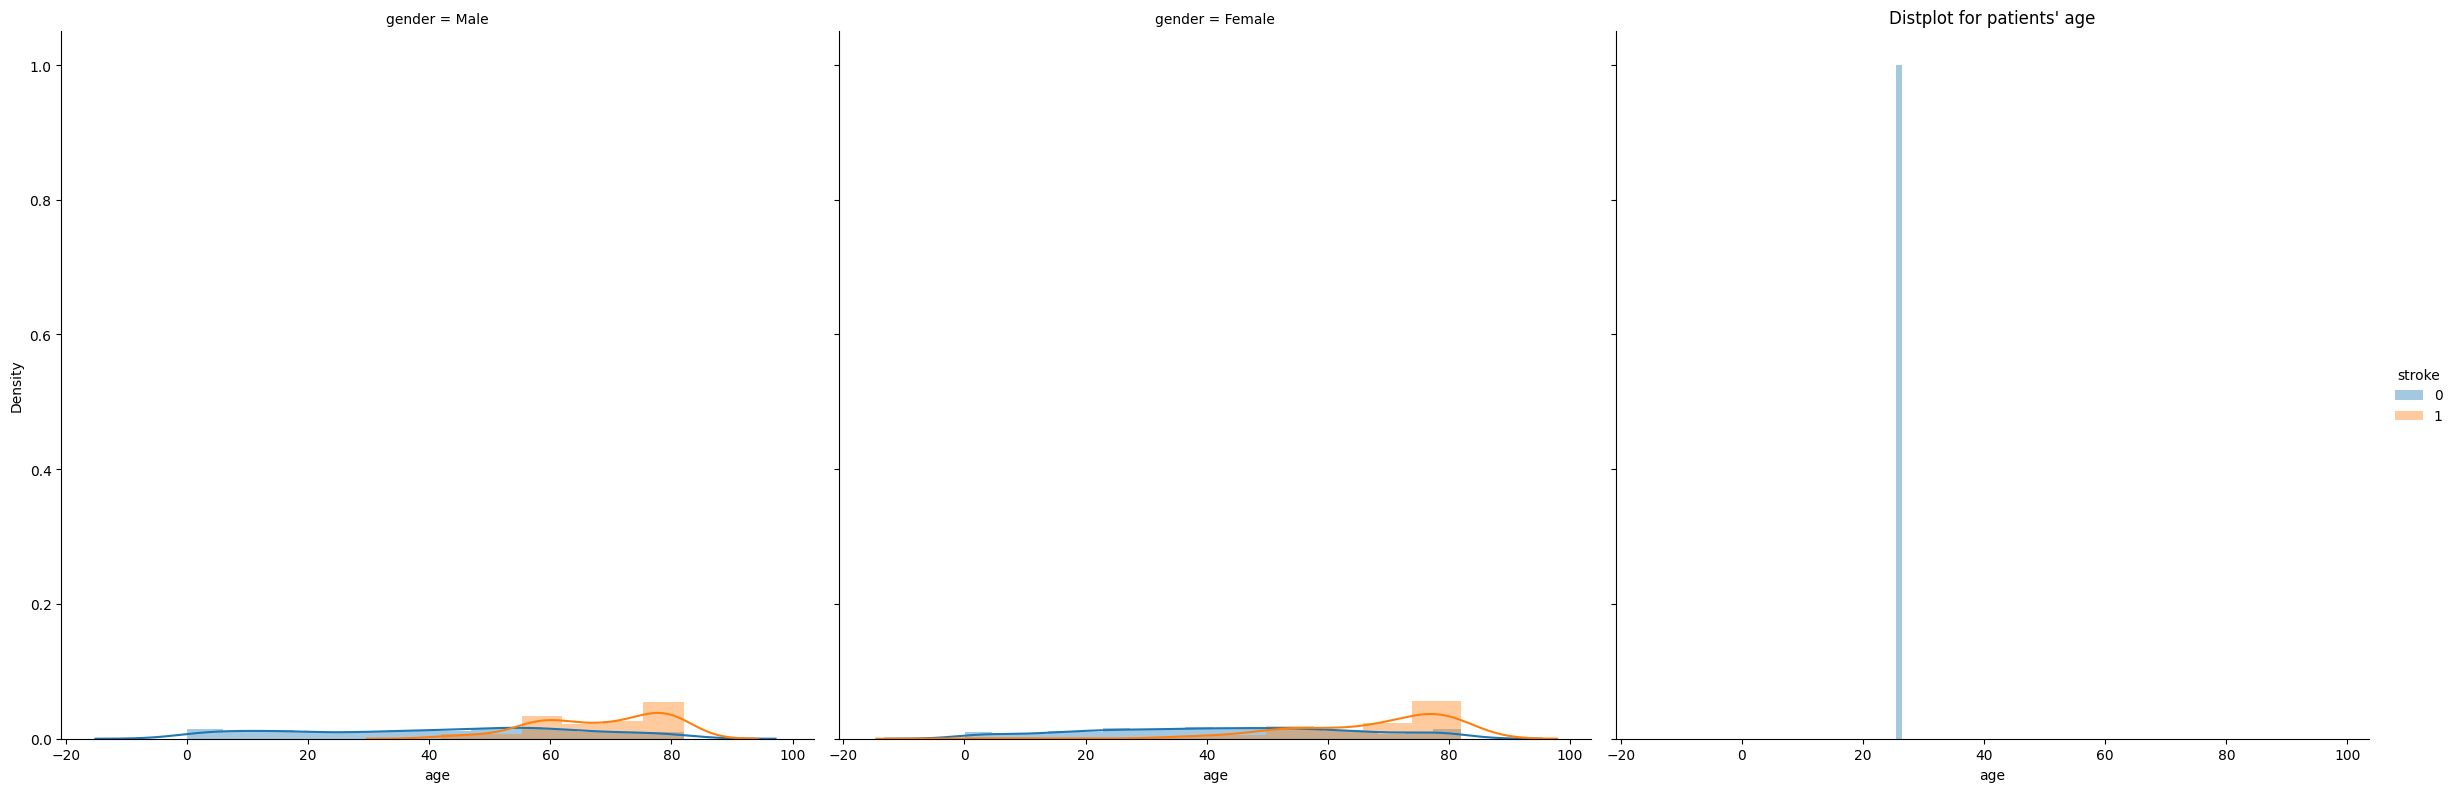

In [37]:
sns.FacetGrid(strokes_data, hue="stroke", col='gender', height = 8).map(sns.distplot, "age").add_legend()
plt.title("Distplot for patients' age")
plt.show()

In [31]:
strokes_data_mf = strokes_data[strokes_data.gender.isin(['Male','Female'])]

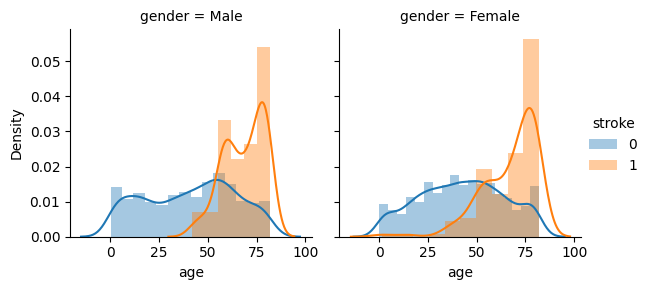

In [33]:
sns.FacetGrid(strokes_data_mf, hue="stroke", col='gender', height = 3).map(sns.distplot, "age").add_legend()
plt.show()

**ANSWER**

# Version Control via Git

## 2
**[10 points]** Git is efficient for collaboration, and expectation in industry, and one of the best ways to share results in academia. You can even use some Git repositories (e.g. Github) as hosts for website, such as with the [course website](https://kylebradbury.github.io/ids705/index.html). As a data scientist with experience in machine learning, Git is expected. We will interact with Git repositories (a.k.a. repos) throughout this course, and your project will require the use of git repos for collaboration.

Complete the [Atlassian Git tutorial](https://www.atlassian.com/git/tutorials/what-is-version-control), specifically the following listed sections. Try each concept that's presented. For this tutorial, instead of using BitBucket as your remote repository host, you may use your preferred platform such as [Github](https://github.com/) or [Duke's Gitlab](https://gitlab.oit.duke.edu/users/sign_in).
1. [What is version control](https://www.atlassian.com/git/tutorials/what-is-version-control)
2. [What is Git](https://www.atlassian.com/git/tutorials/what-is-git)
3. [Install Git](https://www.atlassian.com/git/tutorials/install-git)
4. [Setting up a repository](https://www.atlassian.com/git/tutorials/install-git)
5. [Saving changes](https://www.atlassian.com/git/tutorials/saving-changes)
6. [Inspecting a repository](https://www.atlassian.com/git/tutorials/inspecting-a-repository)
7. [Undoing changes](https://www.atlassian.com/git/tutorials/undoing-changes)
8. [Rewriting history](https://www.atlassian.com/git/tutorials/rewriting-history)
9. [Syncing](https://www.atlassian.com/git/tutorials/syncing)
10. [Making a pull request](https://www.atlassian.com/git/tutorials/making-a-pull-request)
11. [Using branches](https://www.atlassian.com/git/tutorials/using-branches)
12. [Comparing workflows](https://www.atlassian.com/git/tutorials/comparing-workflows)

I also have created two videos on the topic to help you understand some of these concepts: [Git basics](https://www.youtube.com/watch?v=fBCwfoBr2ng) and a [step-by-step tutorial](https://www.youtube.com/watch?v=nH7qJHx-h5s).

For your answer, affirm that you *either* completed the tutorials above OR have previous experience with ALL of the concepts above. Confirm this by typing your name below and selecting the situation that applies from the two options in brackets.

**ANSWER**

*I, [**your name here**], affirm that I have [**completed the above tutorial / I have previous experience that covers all the content in this tutorial**]*

# Exploratory Data Analysis
## 3
**[50 points]** Here you'll bring together some of the individual skills that you demonstrated above and perform exploratory data analysis. Your goal is to explore the [datasets available](https://github.com/lucywowen/csci591_CCN/tree/main/projects) and identify questions or problems you're interested in working with.  Below, we walk through a process to follow for your analysis.

1. Find 3 datasets that interests you and relates to a question or problem that you find intriguing.
2. For each of the 3 datasets, describe the dataset, the source of the data, and the reason the dataset was of interest. What question are you hoping to answer through exploring the dataset?
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized. If the data are clean, state how you know they are clean (what did you check?).
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots. You should have at least a ~3 plots exploring the data in different ways ... so at least 9 plots total.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this for a general audience - boil down your findings in a way that is accessible, but still accurate.
5. Define a clear question you would be interested in working on for the remainder of the semester.  Be prepared to pitch your project proposals to the class!


**ANSWER**